<center><h3>Predict The Price of Books</h3></center>

In [151]:
import pandas as pd
import numpy as np

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from scipy.stats import skew,kurtosis,zscore

In [152]:
train = pd.read_excel('Data_Train.xlsx')
train.name = "Train Dataset"

test = pd.read_excel('Data_Test.xlsx')
test.name = "Test Dataset"

FEATURES: 
 - Title: The title of the book 
 - Author: The author(s) of the book. 
 - Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) 
 - Reviews: The customer reviews about the book 
 - Ratings: The customer ratings of the book 
 - Synopsis: The synopsis of the book 
 - Genre: The genre the book belongs to 
 - BookCategory: The department the book is usually available at. 
 - Price: The price of the book (Target variable)

>Data Understanding

Train DataSet

In [153]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [155]:
train.shape

(6237, 9)

Test Dataset

In [156]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [158]:
test.shape

(1560, 8)

`Train DataSet`:
    
   - we have 9 columns and `6237` entries.
   - `price` is our `target variable`.

`Test Dataset`:
    
   - We have 8 columns except the target variable and `1560` entries

>Data Cleaning

Missing Values

In [159]:
def missing_values(df):
    M = round((df.isnull().sum()/len(df)),2)*100
    print("Missing values in ",df.name)
    print(M[M>0])

In [160]:
missing_values(train)
missing_values(test)

Missing values in  Train Dataset
Series([], dtype: float64)
Missing values in  Test Dataset
Series([], dtype: float64)


    - No missing values in our datasets

`Reviews` : extracting review 

In [161]:
train['Reviews'] = train['Reviews'].apply(lambda x: float(x.split()[0]))
test['Reviews'] = test['Reviews'].apply(lambda x: float(x.split()[0]))

`'Ratings'` : extracting the No. of Ratings

In [162]:
train['Ratings'].value_counts()

1 customer review       1040
2 customer reviews       708
3 customer reviews       491
4 customer reviews       355
5 customer reviews       300
                        ... 
151 customer reviews       1
296 customer reviews       1
325 customer reviews       1
244 customer reviews       1
540 customer reviews       1
Name: Ratings, Length: 342, dtype: int64

In [163]:
train['Ratings'] = train['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(int)
test['Ratings'] = test['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(int)

Standardisation

In [164]:
def to_lower(df,cols):
    for col in cols:
        df[col] = df[col].str.lower()

In [165]:
cols = ['Title','Author','Edition','Synopsis','Genre','BookCategory']

#train dataset
to_lower(train,cols)
#teset dataset
to_lower(test,cols)

In [166]:
train.Genre = train.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))
test.Genre = test.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))

>Feature Engineering

'Extracting' year of publish from the `Edition` column

In [167]:
train['Edition_Year'] = train['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
test['Edition_Year'] = test['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')

In [168]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0,8,the hunters return in their third brilliant no...,action & adventure,action & adventure,220.00,2016
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",202.93,2012
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",4.8,6,"""during the time men live without a common pow...",international relation,humour,299.00,1982
3,a pocket full of rye (miss marple),agatha christie,"paperback,– 5 oct 2017",4.1,13,a handful of grain is found in the pocket of a...,contemporary fiction,"crime, thriller & mystery",180.00,2017
4,life 70 years of extraordinary photography,editors of life,"hardcover,– 10 oct 2006",5.0,1,"for seven decades, ""life"" has been thrilling t...",photography,"arts, film & photography",965.62,2006


>Data Analysis

In [169]:
#Function for barplot Analysis
def Analysis(df,Cols,hue=None):
    plt.figure(figsize=(25,10))
    fig = 1
    i = (len(Cols)//5)+1
    for col in Cols:
        plt.subplot(i, 5, fig)
        title = str(col)+" Analysis"
        plot = sns.barplot(data=df,x=col,y='Price',palette='coolwarm',ci=None,order=sorted(df[col].unique()),hue=hue)
        plot.set_title(title)
#        plt.xticks(rotation=90)
#        ylabels = ['{:,.0%}'.format(y) for y in plot.get_yticks()]
#        plot.set_yticklabels(ylabels)
#        plot.set_ylabel('Books Price')
#        for p in plot.patches:
#            plot.annotate(format(p.get_height(),'.1%'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        fig = fig+1

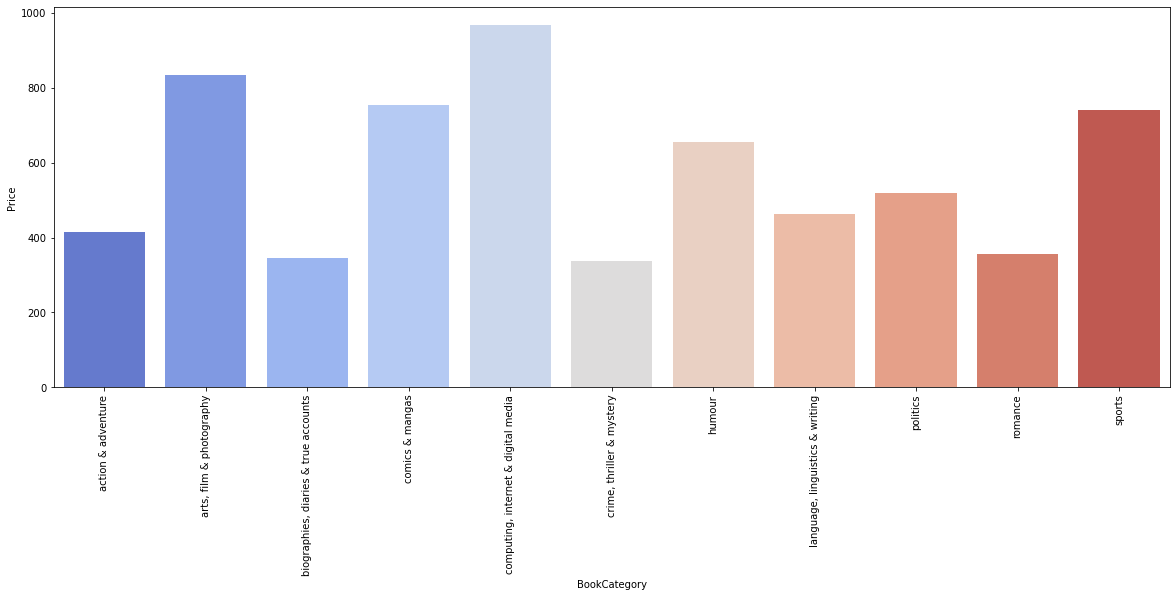

In [170]:
plt.figure(figsize=(20,7))
sns.barplot(data=train,x='BookCategory',y='Price',palette='coolwarm',ci=None,order=sorted(train['BookCategory'].unique()),hue=None)
plt.xticks(rotation=90)
plt.show()

 - `Computing,internet & digital media` Category has higher price value

In [171]:
#Function to check the distribution across the numeric data in the dataset
def distribution_check(df,Cols):
    plt.figure(figsize=(25,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1
        

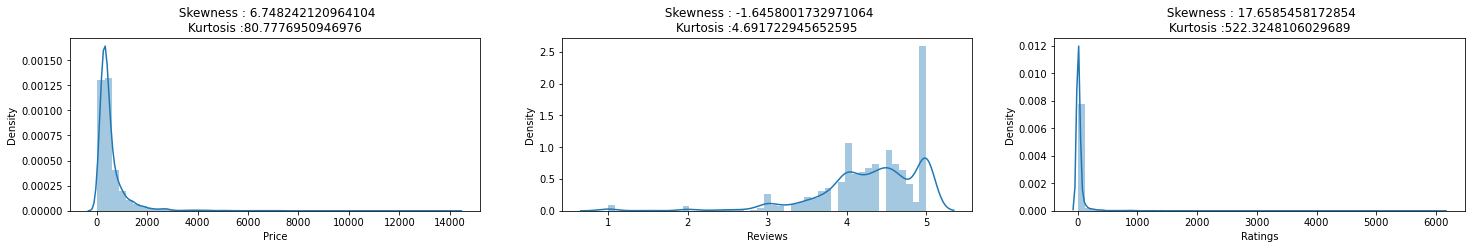

In [172]:
distribution_check(train,['Price','Reviews','Ratings'])

>Data Preparation

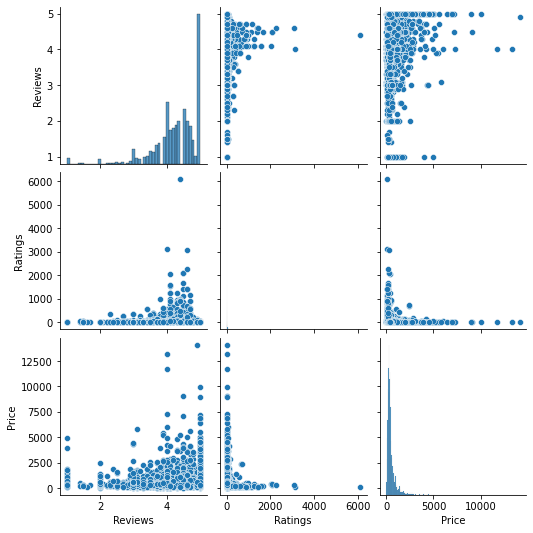

In [173]:
sns.pairplot(train)
plt.show()

<AxesSubplot:>

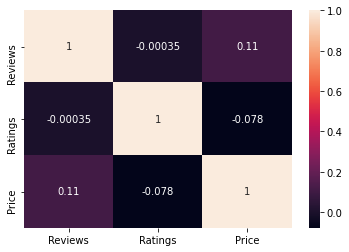

In [174]:
sns.heatmap(train.corr(),annot=True)

>Applying PowerTransformation

In [175]:
from sklearn.preprocessing import PowerTransformer

In [176]:
power = PowerTransformer()

In [177]:
train[['Reviews']] = power.fit_transform(train[['Reviews']])
train[['Ratings']] = power.fit_transform(train[['Ratings']])
train[['Price']] = power.fit_transform(train[['Price']])

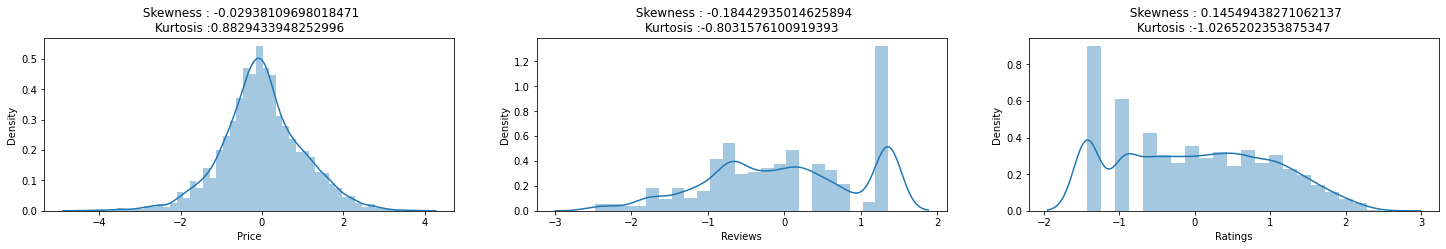

In [178]:
distribution_check(train,['Price','Reviews','Ratings'])

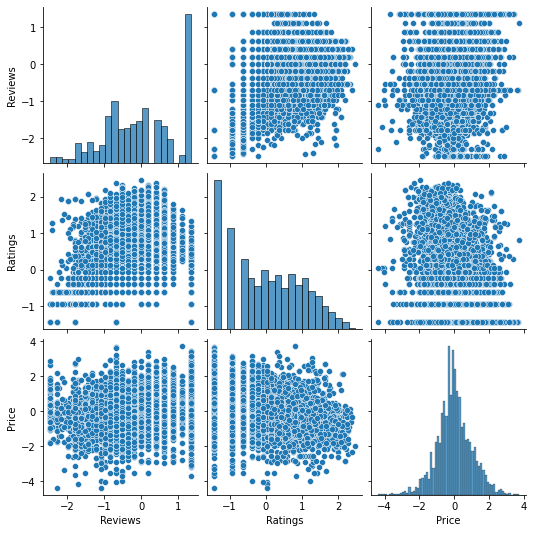

In [179]:
sns.pairplot(train)
plt.show()

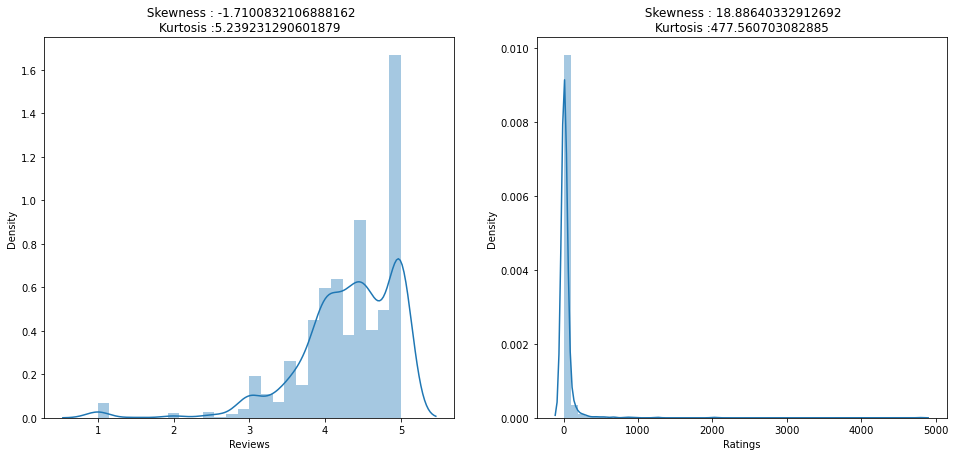

In [180]:
distribution_check(test,['Reviews','Ratings'])

In [181]:
test[['Reviews']] = power.transform(test[['Reviews']])
test[['Ratings']] = power.transform(test[['Ratings']])

In [182]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",-0.688861,0.138231,the hunters return in their third brilliant no...,action & adventure,action & adventure,-0.769233,2016
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",-0.834876,0.526742,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",-0.885866,2012
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",0.853798,-0.076231,"""during the time men live without a common pow...",international relation,humour,-0.337797,1982
3,a pocket full of rye (miss marple),agatha christie,"paperback,– 5 oct 2017",-0.533420,0.477727,a handful of grain is found in the pocket of a...,contemporary fiction,"crime, thriller & mystery",-1.061408,2017
4,life 70 years of extraordinary photography,editors of life,"hardcover,– 10 oct 2006",1.359627,-1.427835,"for seven decades, ""life"" has been thrilling t...",photography,"arts, film & photography",1.150774,2006


In [183]:
train.drop(columns=['Edition','Synopsis','Title'],inplace=True)

In [184]:
test.drop(columns=['Edition','Synopsis','Title'],inplace=True)

In [185]:
train.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
0,chris kuzneski,-0.688861,0.138231,action & adventure,action & adventure,-0.769233,2016
1,arun khopkar,-0.834876,0.526742,cinema & broadcast,"biographies, diaries & true accounts",-0.885866,2012
2,thomas hobbes,0.853798,-0.076231,international relation,humour,-0.337797,1982
3,agatha christie,-0.533420,0.477727,contemporary fiction,"crime, thriller & mystery",-1.061408,2017
4,editors of life,1.359627,-1.427835,photography,"arts, film & photography",1.150774,2006


In [186]:
len(train.Author.unique())

3670

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Reviews       6237 non-null   float64
 2   Ratings       6237 non-null   float64
 3   Genre         6237 non-null   object 
 4   BookCategory  6237 non-null   object 
 5   Price         6237 non-null   float64
 6   Edition_Year  6237 non-null   object 
dtypes: float64(3), object(4)
memory usage: 341.2+ KB


Changing the dtype of categorical values to `category`

In [188]:
train = train.astype({'Author':'category','Genre':'category','BookCategory':'category','Edition_Year':'category'})

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Reviews       6237 non-null   float64 
 2   Ratings       6237 non-null   float64 
 3   Genre         6237 non-null   category
 4   BookCategory  6237 non-null   category
 5   Price         6237 non-null   float64 
 6   Edition_Year  6237 non-null   category
dtypes: category(4), float64(3)
memory usage: 387.5 KB


In [190]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        1560 non-null   object 
 1   Reviews       1560 non-null   float64
 2   Ratings       1560 non-null   float64
 3   Genre         1560 non-null   object 
 4   BookCategory  1560 non-null   object 
 5   Edition_Year  1560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 73.2+ KB


In [191]:
test = test.astype({'Author':'category','Genre':'category','BookCategory':'category','Edition_Year':'category'})

In [192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Reviews       6237 non-null   float64 
 2   Ratings       6237 non-null   float64 
 3   Genre         6237 non-null   category
 4   BookCategory  6237 non-null   category
 5   Price         6237 non-null   float64 
 6   Edition_Year  6237 non-null   category
dtypes: category(4), float64(3)
memory usage: 387.5 KB


In [193]:
y=train.pop('Price')

In [194]:
df = pd.concat(objs=[train,test],axis=0)

In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [196]:
cols_toEncode = ['Author','Genre','BookCategory','Edition_Year']

In [197]:
df['Author'] = le.fit_transform(df['Author'])

In [198]:
df['Genre'] = le.fit_transform(df['Genre'])

In [199]:
df['BookCategory'] = le.fit_transform(df['BookCategory'])

In [200]:
df['Edition_Year'] = le.fit_transform(df['Edition_Year'])

In [201]:
train_size = len(train)

In [202]:
train = df[:train_size]
test = df[train_size:]

In [203]:
train = train.astype({'Author':'int','Genre':'int','BookCategory':'int','Edition_Year':'int'})

In [204]:
test = test.astype({'Author':'int','Genre':'int','BookCategory':'int','Edition_Year':'int'})

We have combined the test, train for Label Encoder inorder to have all the possible values

In [205]:
train['Price'] = y

Splitting the train data to x_train & y_train

In [206]:
y_train = train.pop('Price')
X_train = train

>Model Building `LightGBM`

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

    - Faster training speed and higher efficiency.
    - Lower memory usage.
    - Better accuracy.
    - Support of parallel and GPU learning.
    - Capable of handling large-scale data.

In [207]:
import lightgbm as lgb

In [208]:
#convert the dataset to lgbDataset
df_train = lgb.Dataset(X_train,y_train)

LightGBM can use categorical features directly (without one-hot encoding). hows about 8x speed-up compared with one-hot encoding.
  - We specify either index, label of the categorical columns as below

In [209]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1', 'auc'],
    'learning_rate': 1,
    'categorical_feature':[0,3,4,5],
    'num_iterations':10000
}

In [210]:
rg = lgb.LGBMRegressor(**hyper_params)

LightGBM uses histogram-based algorithms, which bucket continuous feature (attribute) values into discrete bins. This speeds up training and reduces memory usage
 - it grows trees by leaf-wise. It will choose the leaf with max delta loss to grow

In [211]:
rg.fit(X_train,y_train)

LGBMRegressor(categorical_feature=[0, 3, 4, 5], learning_rate=1,
              metric=['l1', 'auc'], num_iterations=10000,
              objective='regression', task='train')

In [212]:
y_pred_train = rg.predict(X_train)

In [213]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [214]:
y_pred_train

array([-0.76923323, -0.88586557, -0.33779669, ...,  0.05151625,
       -0.24906556, -0.3873044 ])

In [215]:
print("Train MSE:",np.sqrt(mean_squared_error(y_train,y_pred_train))) 

Train MSE: 0.17225311354181036


In [216]:
print("Train r2_score:",r2_score(y_train, y_pred_train))

Train r2_score: 0.9703288648751522


Test Predictions

In [217]:
y_test_pred = rg.predict(test)

In [218]:
y_test_pred = pd.DataFrame(y_test_pred,columns=['Price'])

In [219]:
predictions = power.inverse_transform(y_test_pred[['Price']])

In [220]:
pd.DataFrame(predictions,columns=['Price']).to_csv('my_submission_1.csv',index=None)

Hope this notebook gives you breif intro on `LightGBM` .